In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist

2023-05-22 20:16:46.524821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 20:16:46.875438: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-22 20:16:46.936406: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 20:16:46.936445: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [6]:
#loading MNIST dataset

In [7]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

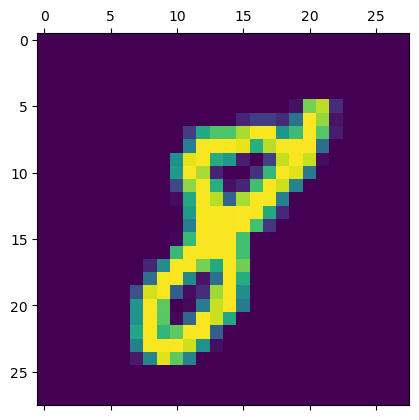

In [16]:
plt.matshow(x_train[17])

In [17]:
x_train_flat = tf.keras.utils.normalize(x_train , axis = 1)
x_test_flat = tf.keras.utils.normalize(x_test , axis = 1)

In [18]:
x_train_flat[12]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

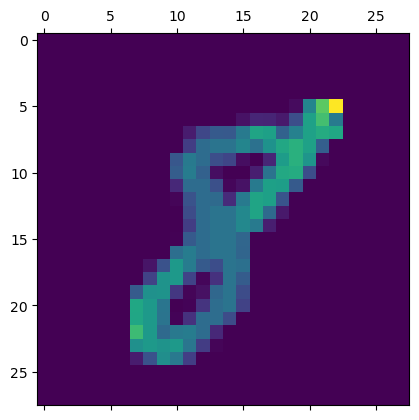

In [19]:
plt.matshow(x_train_flat[17])

In [13]:
#BUILDING neural network 

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

2023-05-22 20:27:39.731841: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-22 20:27:39.731886: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-22 20:27:39.731925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Windows): /proc/driver/nvidia/version does not exist
2023-05-22 20:27:39.732441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3339 - accuracy: 0.9075
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1545 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1089 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9814


In [21]:
#Calculating the LOSS and ACCURACY for TRAINING DATA

In [22]:
val_loss , val_accur = model.evaluate(x_test_flat , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9696


In [23]:
# Now testing or PREDICTING the IMAGES using PREDICT function

In [24]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_predicted[100]  #Printing first 100 VALUES

array([4.5806769e-06, 3.5538127e-07, 5.3378444e-06, 4.6333550e-08,
       6.9997850e-07, 3.5002463e-06, 9.9998492e-01, 3.8457442e-09,
       4.7287676e-07, 1.4505460e-09], dtype=float32)

In [26]:
#Now its time to PREDICTING THE IMAGES ON THE BASIS OF TEST DATA

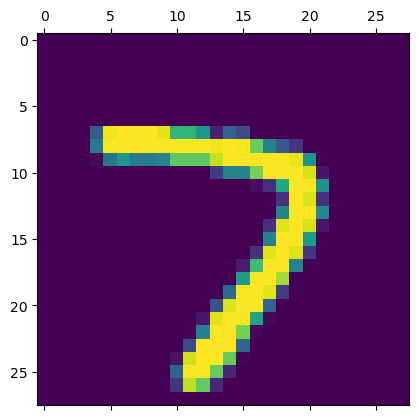

In [27]:
#Firstly check which image we are going to predict
plt.matshow(x_test[17])

In [28]:
np.argmax(y_predicted[17])

7

In [25]:
#  Drowing the confusion matrix

from tensorflow.math import confusion_matrix

In [26]:
y_predict_labels = [np.argmax(i) for i in y_predicted]
print(y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [27]:
conf_matr = confusion_matrix(y_test , y_predict_labels)

In [28]:
conf_matr

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    1,    0,    3,    1,    1,    3],
       [   0, 1117,    4,    0,    0,    0,    3,    2,    9,    0],
       [   4,    2,  994,    7,    4,    0,    3,    9,    8,    1],
       [   0,    2,    7,  976,    1,    3,    0,    5,   13,    3],
       [   0,    0,    4,    1,  953,    0,    6,    3,    4,   11],
       [   2,    0,    0,   18,    1,  849,    4,    6,   11,    1],
       [   8,    2,    1,    1,    3,    4,  935,    0,    4,    0],
       [   1,    3,    7,    6,    0,    0,    0, 1003,    1,    7],
       [   2,    1,    3,    4,    5,    2,    2,    5,  946,    4],
       [   2,    6,    0,    6,    6,    2,    1,    3,    6,  977]],
      dtype=int32)>